In [1]:
import sys
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
dataroot = '../ERA5_plus_STD'
filename1 = '1D_SD_ERA5_input_2.mat'
filename2 = 'lonlat_era5.mat'
outname = 'era5flux.nc'

In [3]:
dat_org = sio.loadmat(os.path.join(dataroot, filename1))
dat_loc = sio.loadmat(os.path.join(dataroot, filename2))

In [4]:
era5_met = dat_org['ERA5_met'][0,0]
keys = [v[0] for v in era5_met.dtype.descr]
print(keys)

['time', 'qlat', 'qsens', 'lw', 'sw', 'precip', 'tau', 'U', 'Udir']


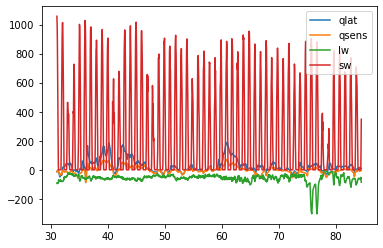

In [5]:
for key in ['qlat', 'qsens', 'lw', 'sw']:
    plt.plot(era5_met['time'], era5_met[key], label=key)
plt.legend()

In [6]:
atime = dat_loc['latlon_time']
time = xr.DataArray(
    atime.squeeze(),
    dims = ('time'),
    coords = {'time': atime.squeeze()},
    attrs = {'long_name': 'time', 'units': 'day of year'}
)

In [7]:
longname = {
    'lon':    'Longitude',
    'lat':    'Latitude',
    'qlat':   'Latent heat flux',
    'qsens':  'Sensible heat flux',
    'lw':     'Longwave heat flux',
    'sw':     'Shortwave heat flux',
    'tau':    'Wind stress',
    'U':      '10-meter wind speed',
    'Udir':   'Wind direction',
    }
units = {
    'lon':    'degree_east',
    'lat':    'degree_north',
    'qlat':   'W m$^{-2}$',
    'qsens':  'W m$^{-2}$',
    'lw':     'W m$^{-2}$',
    'sw':     'W m$^{-2}$',
    'tau':    'N m$^{-2}$',
    'U':      'm s$^{-1}$',
    'Udir':   'degree',
    }
factor = {
    'qlat':   -1.,
    'qsens':  -1.,
    'lw':     1.,
    'sw':     1.,
    'tau':    1.,
    'U':      1.,
    'Udir':   1.,
    }

In [8]:
out = xr.Dataset()
for var in ['lon', 'lat']:
    out[var] = xr.DataArray(
        dat_loc[var+'_era5'].squeeze(),
        dims = ('time'),
        coords = {'time': time},
        attrs = {'long_name': longname[var], 'units': units[var]}
    )
for var in ['qlat', 'qsens', 'lw', 'sw', 'tau', 'U', 'Udir']:
    out[var] = xr.DataArray(
        era5_met[var].squeeze()*factor[var],
        dims = ('time'),
        coords = {'time': time},
        attrs = {'long_name': longname[var], 'units': units[var]}
    )

In [9]:
out

<xarray.Dataset>
Dimensions:  (time: 1285)
Coordinates:
  * time     (time) float64 31.02 31.06 31.1 31.15 ... 84.4 84.44 84.48 84.52
Data variables:
    lon      (time) float64 -165.7 -165.7 -165.6 -165.6 ... -51.26 -51.2 -51.16
    lat      (time) float64 -53.79 -53.78 -53.77 -53.77 ... -57.71 -57.69 -57.68
    qlat     (time) float64 14.24 12.07 7.486 1.802 ... -8.976 -9.423 -9.208
    qsens    (time) float64 11.72 9.848 5.95 1.323 ... 5.454 4.875 5.03 5.056
    lw       (time) float64 -90.88 -94.11 -95.46 -89.55 ... -51.92 -64.76 -85.58
    sw       (time) float64 1.057e+03 997.6 876.7 666.9 ... 9.308 143.9 347.7
    tau      (time) float64 0.0583 0.04087 0.02027 ... 0.06687 0.06424 0.06016
    U        (time) float64 5.718 4.9 3.768 2.357 ... 7.185 6.75 6.845 7.036
    Udir     (time) float64 85.1 87.62 85.4 119.1 ... 73.28 71.19 73.91 82.94

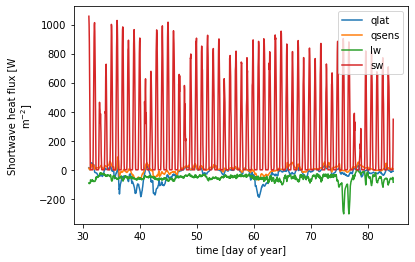

In [10]:
for key in ['qlat', 'qsens', 'lw', 'sw']:
    out.data_vars[key].plot(label=key)
plt.legend()

In [11]:
out.to_netcdf(os.path.join(dataroot, outname))